<a href="https://www.kaggle.com/code/anderaraujo/customer-clusterization-eda-k-means?scriptVersionId=164924225" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Clustering Customers with K-Means

## Objective

- Exploring data 
- Answering questions through visualizations
- Finding the best clusterization according to algorithm metrics
- Exploring data about clusters generated

Upgrading Seaborn

In [1]:
!pip install --upgrade seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.4 requires seaborn<0.13,>=0.10.1, but you have seaborn 0.13.2 which is incompatible.


Getting Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

I am going to create two dataframes for analysis

In [3]:
df_num  = pd.read_csv('/kaggle/input/customer-clustering/segmentation data.csv')
df_num = df_num.iloc[:,1:]
df_num.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [4]:
df  = pd.read_csv('/kaggle/input/customer-clustering/segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


Below we are going to revert dataframe to the labeled format again in order to perform an EDA

In [5]:
df['Sex'] = df['Sex'].replace({0:'male',1:'female'})

df['Marital status'] = df['Marital status'].replace({0:'single',1:'non-single'})

df['Education'] = df['Education'].replace({0:'other / unknown',
                        1:'high school',
                        2:'university',
                        3:'graduate school'})

df['Occupation'] = df['Occupation'].replace({0:'unemployed / unskilled',
                            1:'skilled employee / official',
                            2:'management / self-employed / highly qualified employee / officer'})

df['Settlement size'] = df['Settlement size'].replace({0:'small city',
                                1:'mid-sized city',
                                2:'big city'})


Let's define a function to print plots faster

# Exploratory Data Analysis

In [6]:
def print_plot(var1, var2):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data = df, x = var1, hue = var2)
    ax.bar_label(ax.containers[0], fontsize=10)
    ax.bar_label(ax.containers[1], fontsize=10)
    ax.set(title = f'{var1} per {var2}')
    ax.legend(loc = 'upper left')
    ax.set_yticks([])
    ax.set_ylabel('')

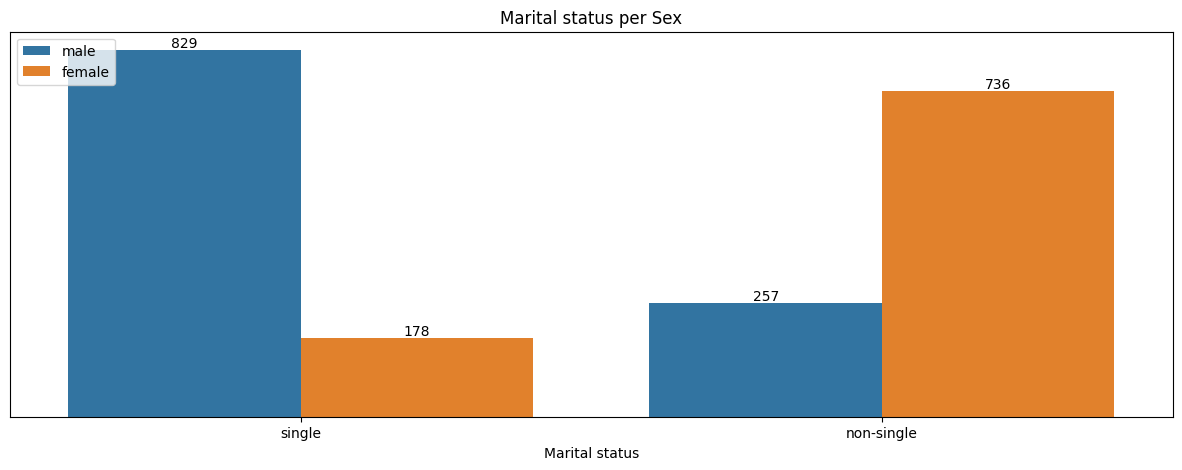

In [7]:
print_plot('Marital status', 'Sex')

We can see that we have more mens single

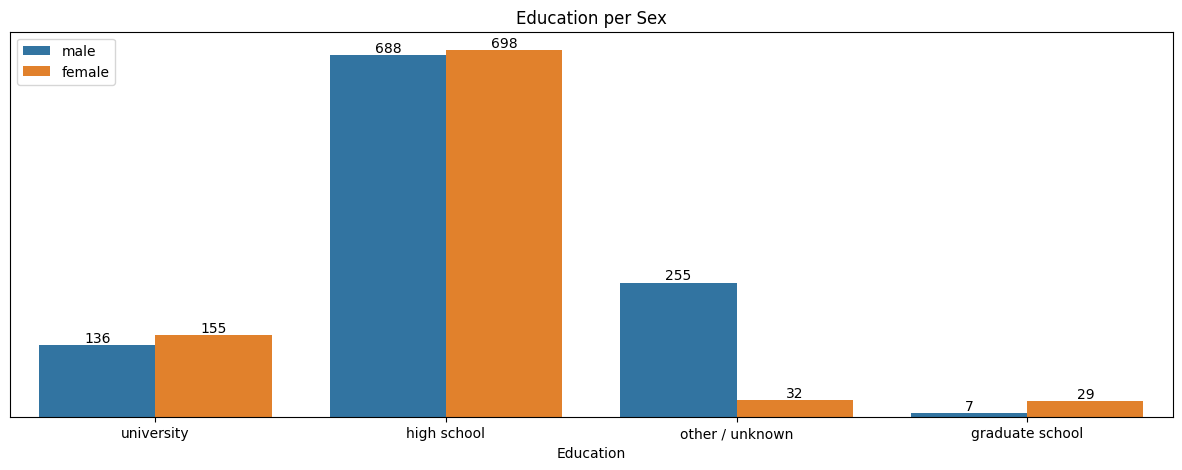

In [8]:
print_plot('Education','Sex')

Womens are used to study more than Mens, even Woman population being smaller

<Axes: xlabel='Education', ylabel='Age'>

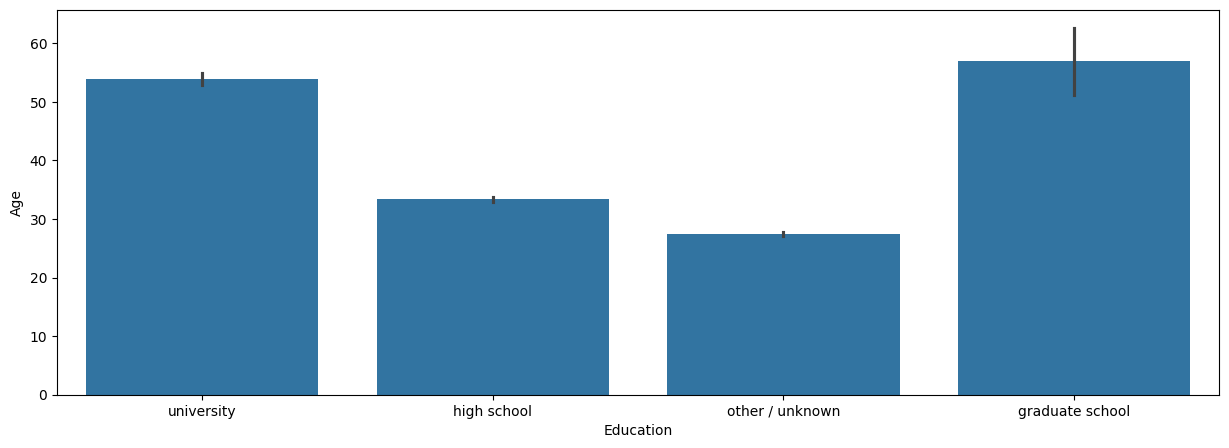

In [9]:
plt.figure(figsize = (15,5))
sns.barplot(data = df, x = 'Education', y = 'Age')

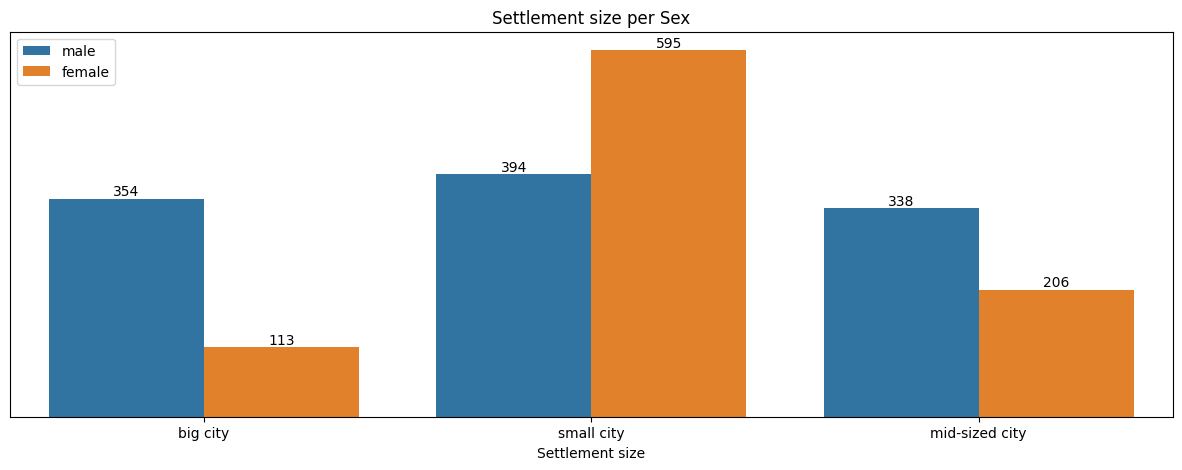

In [10]:
print_plot('Settlement size','Sex')

We can see that Womens are mostly located in small cities than Mens

Text(35.909, 310, 'age mean = 35.91 years')

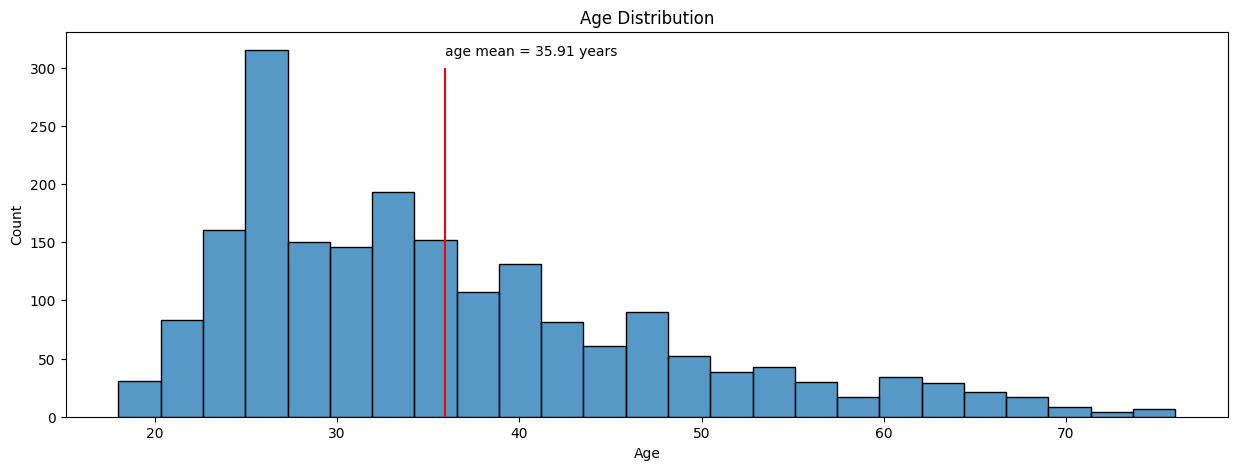

In [11]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data = df, x = 'Age')
ax.set(title = 'Age Distribution')
plt.vlines(df.Age.mean(),0, 300, color = 'red')
plt.annotate('age mean = %.2f years' % df.Age.mean(), (df.Age.mean(), 310))

We see the most part of population are under 35 and our distribution is right skewed

Text(120954.419, 200, 'age mean = 120954.42')

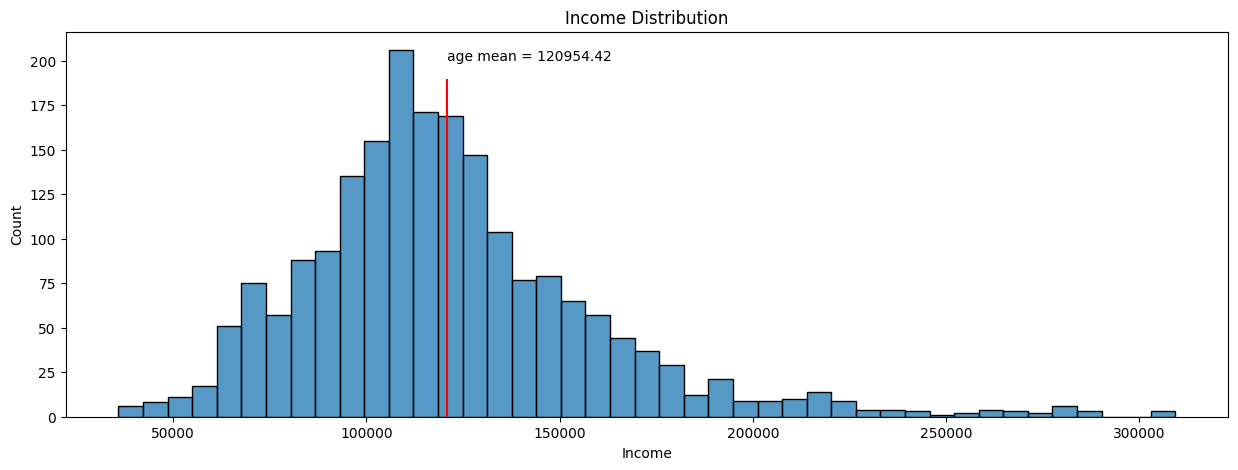

In [12]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data = df, x = 'Income')
ax.set(title = 'Income Distribution')
plt.vlines(df.Income.mean(),0, 190, color = 'red')
plt.annotate('age mean = %.2f' % df.Income.mean(), (df.Income.mean(), 200))

Considering this distribution we can perceive we have outliers. Let's confirm it

[Text(0.5, 1.0, 'Income Distribution')]

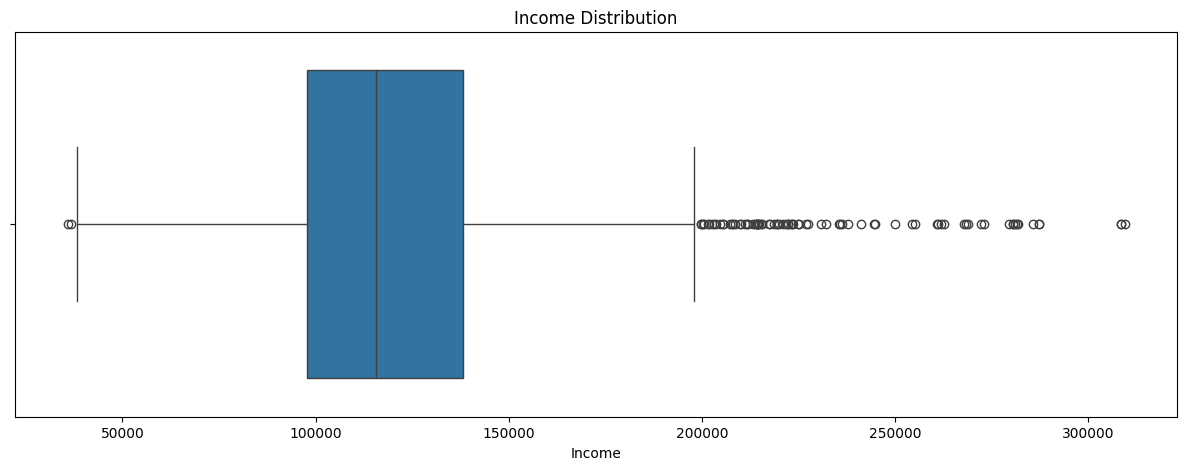

In [13]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data = df, x = 'Income',)
ax.set(title = 'Income Distribution')

We have outliers for Income. However it will be used

Text(0.5, 1.0, 'Correlation Plot')

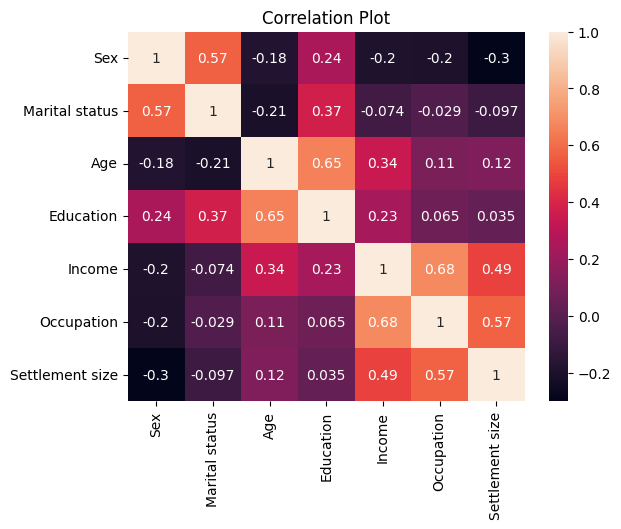

In [14]:
ax = sns.heatmap(df_num.corr(), annot = True)
ax.set_title('Correlation Plot')

**Observations about correlation matrix**
- Elder people use to have a better education
- Better occupations earns more money
- Better income is related to settlement size
- Elder people use to earn more money
- Better occupations are in big cities
- Female gender use to be non-single

In [15]:
from sklearn.cluster import KMeans
clusters = range(1,20)
inertias = []
for n in clusters:
    kmeans = KMeans(n_init = 1, n_clusters = n)
    fitted_model = kmeans.fit(df_num)
    inertias.append(fitted_model.inertia_)
    

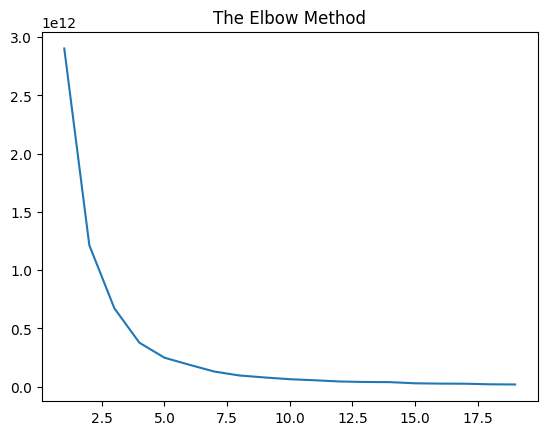

In [16]:
ax = sns.lineplot(x = range(1,20), y = inertias)
ax.set_title('The Elbow Method')
plt.show()

According to the elbow method we can assume 5 clusters for our data

In [17]:
SEED = np.random.seed(300)
kmeans = KMeans(n_clusters = 5, random_state=SEED)
labels = kmeans.fit_predict(df_num)
df_num['cluster'] = labels

<Axes: xlabel='Age', ylabel='Income'>

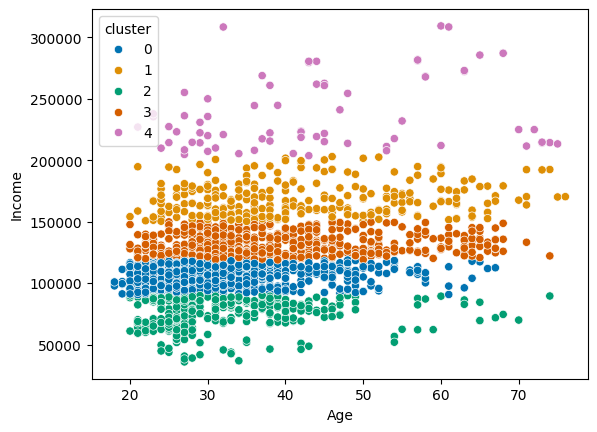

In [18]:
sns.scatterplot(data = df_num, x = 'Age', y = 'Income', hue = 'cluster', palette='colorblind')

five cluster is aceptable, but let's see if it can be better

In [19]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_num, df_num.cluster)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5401417577104871


The silhouette score ranges from -1 to 1.    
A higher silhouette score indicates better-defined clusters.    
Evaluate the score based on the following guidelines:    
0.71 - 1.0: Excellent clustering.    
0.51 - 0.70: Reasonable clustering.    
0.26 - 0.50: Poor clustering.    
Less than 0.25: Very poor clustering

Let's try different numbers of clusters

### Size of cluster = 3

In [20]:
SEED = np.random.seed(300)
df_num.drop(columns = 'cluster')
kmeans = KMeans(n_clusters = 3, random_state = SEED)
labels = kmeans.fit_predict(df_num)
df_num['cluster'] = labels
silhouette_avg = silhouette_score(df_num, df_num.cluster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5124711688681454


### Size of cluster = 4

In [21]:
SEED = np.random.seed(300)
df_num.drop(columns = 'cluster')
kmeans = KMeans(n_clusters = 4, random_state = SEED)
labels = kmeans.fit_predict(df_num)
df_num['cluster'] = labels
silhouette_avg = silhouette_score(df_num, df_num.cluster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5428478923817803


### Size of cluster = 6

In [22]:
SEED = np.random.seed(300)
df_num.drop(columns = 'cluster')
kmeans = KMeans(n_clusters = 6, random_state = SEED)
labels = kmeans.fit_predict(df_num)
df_num['cluster'] = labels
silhouette_avg = silhouette_score(df_num, df_num.cluster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5426264825106625


We can conclude that the best number of clusters was 4 according to silhouette score.

In [23]:
# Getting data with 4 clusters
SEED = np.random.seed(300)
df_num.drop(columns = 'cluster')
kmeans = KMeans(n_clusters = 4, random_state = SEED)
labels = kmeans.fit_predict(df_num)
df_num['cluster'] = labels
silhouette_avg = silhouette_score(df_num, df_num.cluster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5428478923817803


<Axes: xlabel='Age', ylabel='Income'>

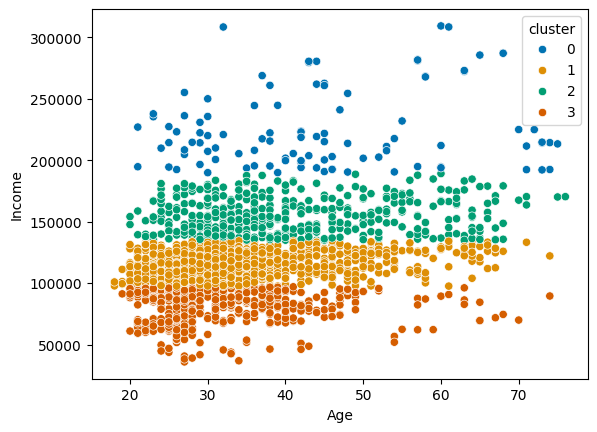

In [24]:
sns.scatterplot(data = df_num, x = 'Age', y = 'Income', hue = 'cluster', palette='colorblind')

## Exploratory Analysis per Cluster

In [25]:
df = df.merge(df_num['cluster'], right_index=True, left_index = True)

### Which Cluster has the best income?

Text(0.5, 1.0, 'Income per cluster')

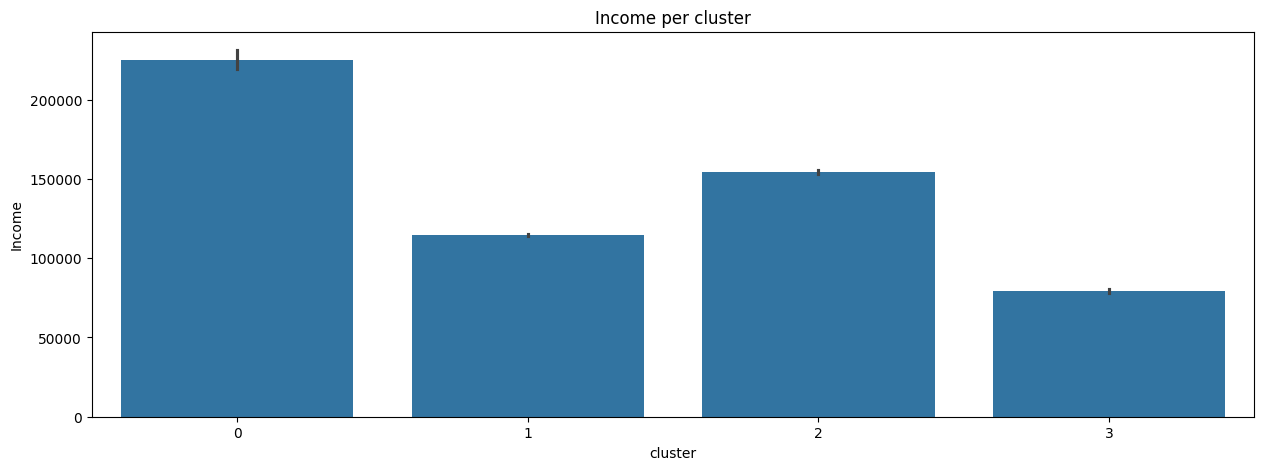

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(df, x = 'cluster', y = 'Income')
plt.title('Income per cluster')

### Which cluster has the best education level?

Text(0.5, 1.0, 'Education level per cluster')

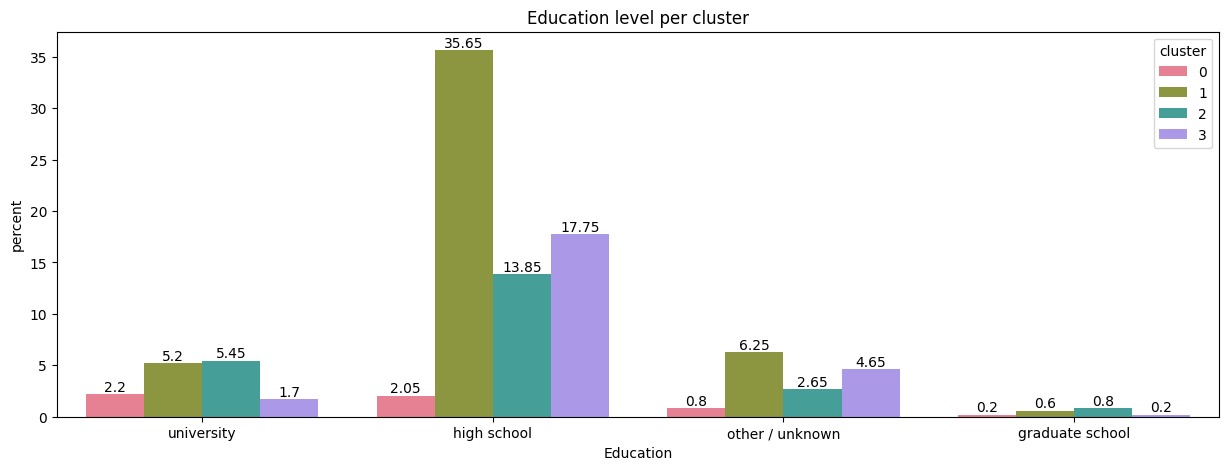

In [27]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df, x = 'Education', hue = 'cluster',stat='percent', palette = sns.color_palette('husl', 4))
for i in range(0, 4):
    ax.bar_label(ax.containers[i])
plt.title('Education level per cluster')

Cluster 2 has more people with university.    
Cluster 1 has the bigger population with high school.    


### What is the average age per cluster?

Text(0.5, 1.0, 'Age per cluster')

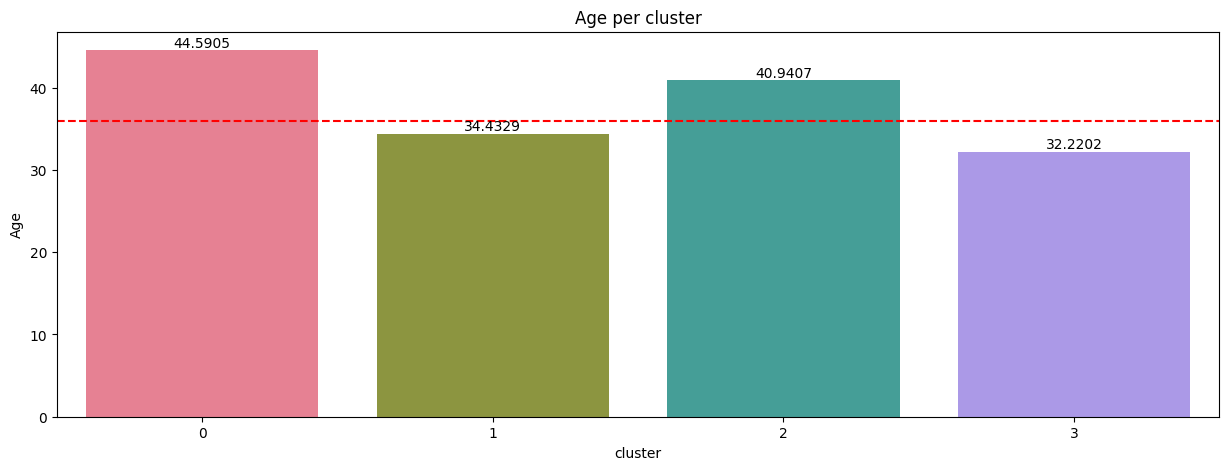

In [28]:
plt.figure(figsize=(15,5))
ax = sns.barplot(df, x = 'cluster', y = 'Age', palette = sns.color_palette('husl', 4), ci = None)
for i in range(0, 4):
    ax.bar_label(ax.containers[i])
plt.axhline(df['Age'].mean(), 0,4, linestyle = '--', color = 'red')
plt.title('Age per cluster')

Cluster 3 are the youngest cluster.    
Cluster 0 are the eldest cluster.    
Clusters 0 and 2 are higher than average age.

### What is the amount of women and men per cluster?

Text(0.5, 1.0, 'Percent of Women and Men per cluster')

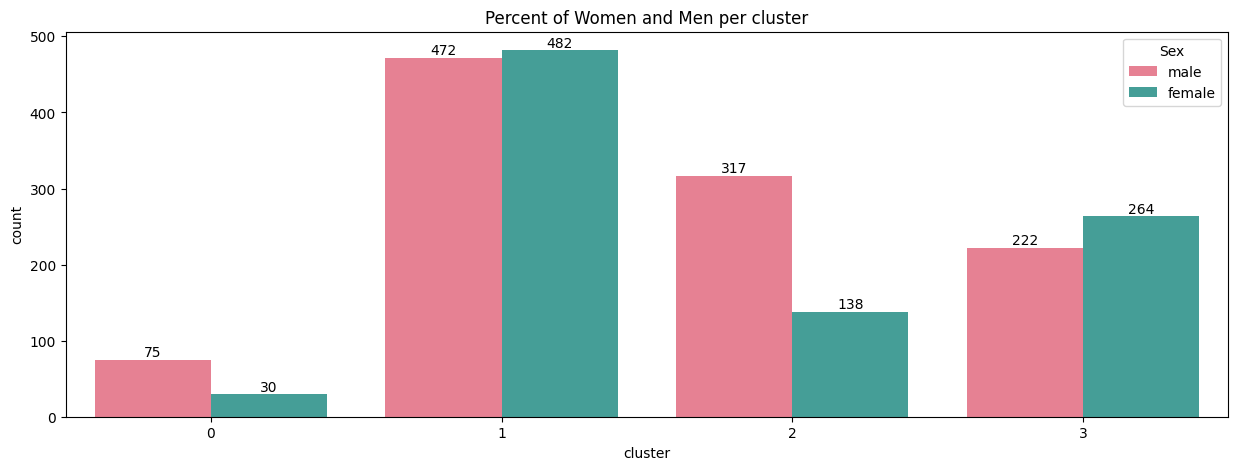

In [29]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df, x = 'cluster', hue = 'Sex', palette = sns.color_palette('husl', 2))
for i in range(0, 2):
    ax.bar_label(ax.containers[i])
plt.title('Percent of Women and Men per cluster')

Women amount are higher than Men for clusters 1, 3.    
Men are more present in clusters 0 and 2. Curiously this clusters are elder than the others.

### Is Salary correlated with Age?

Text(0.5, 1.0, 'Income per Age clustered')

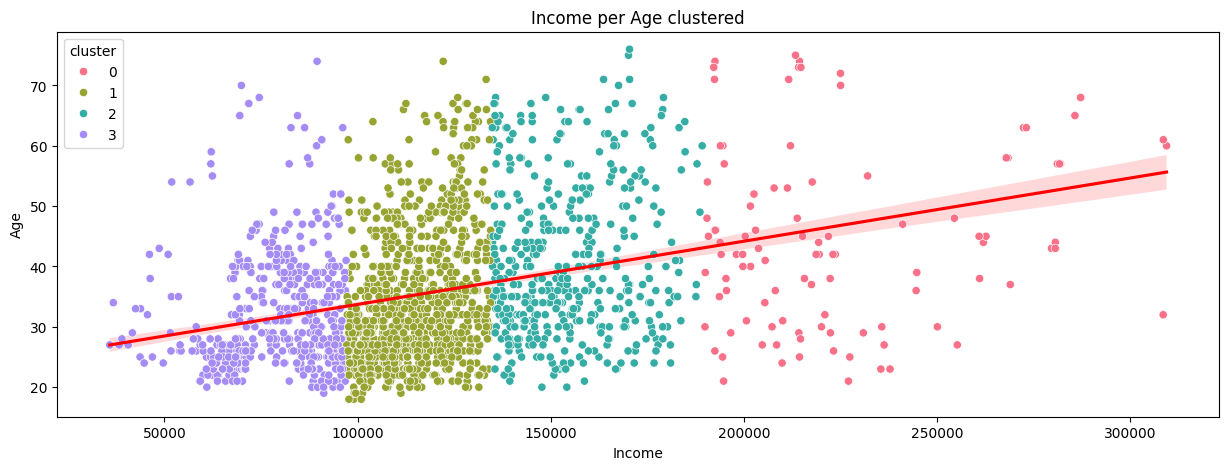

In [30]:
plt.figure(figsize=(15,5))
sns.regplot(df, x = 'Income', y= 'Age',scatter_kws={'alpha':0.0}, line_kws={'color':'red'})
sns.scatterplot(df, x='Income',y='Age',hue='cluster', palette = sns.color_palette('husl', 4))
plt.title('Income per Age clustered')

We can see that elder people earns more money than yonger people and we have it clusterized.

### What would be a summary for each cluster?

In [31]:
from scipy import stats
df.groupby('cluster').agg({'Sex':pd.Series.mode,
                           'Marital status':pd.Series.mode,
                           'Age':'mean','Education':pd.Series.mode,
                           'Income':'mean','Occupation':pd.Series.mode,
                          'Settlement size':pd.Series.mode})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster,,,,,,,
0,male,single,44.590476,university,225124.866667,management / self-employed / highly qualified ...,big city
1,female,non-single,34.432914,high school,114888.382600,skilled employee / official,small city
2,male,single,40.940659,high school,154237.230769,skilled employee / official,mid-sized city
3,female,non-single,32.220165,high school,79196.028807,unemployed / unskilled,small city


We could do much more analysis based on our clusters.